In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
from scipy.optimize import curve_fit
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

[  3.25011075e-05   1.01351108e+00] [  7.55450096e-06   1.01473798e+00]


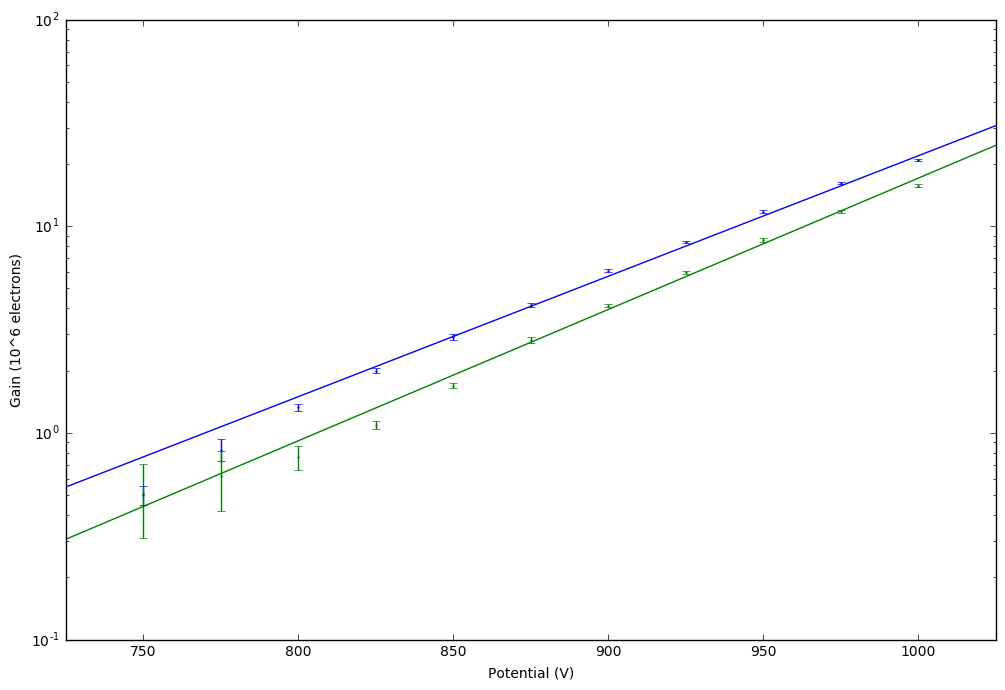

In [5]:
voltage = [750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
gain1 = [0.5, 0.83, 1.33, 2.00, 2.90, 4.16, 6.10, 8.39, 11.72, 16.11, 20.82]
err1 = [0.05, 0.1, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
gain2 = [0.51, 0.62 ,0.76, 1.09, 1.69, 2.82, 4.13, 6.00, 8.61, 11.82, 15.7]
err2 = [0.2, 0.2, 0.1, 0.05, 0.05, 0.1, 0.05, 0.1, 0.2, 0.2, 0.3]

tempvoltage = [800,900,1000]
tempgain1 = [0.75, 5.45, 19.73]
temperr1 = [0.1, 0.1, 0.2]
tempgain2 = [0.58, 3.25, 12.74]
temperr2 = [0.1, 0.05, 0.3]

def func(x, a, b):
    return a * b**x

popt1, pcov1 = curve_fit(func, voltage, gain1, sigma = err1)
popt2, pcov2 = curve_fit(func, voltage, gain2, sigma = err2)


print(popt1, popt2)

voltagerange = np.arange(700, 1100, 10)
fitgain1 = [func(x, popt1[0], popt1[1]) for x in voltagerange]
fitgain2 = [func(x, popt2[0], popt2[1]) for x in voltagerange]
plt.plot(voltagerange, fitgain1)
plt.plot(voltagerange, fitgain2)

plt.errorbar(voltage, gain1, yerr = err1, marker = '.', markersize = 2, ls='none', color = 'blue')
plt.errorbar(voltage, gain2, yerr = err2, marker = '.', markersize = 2, ls='none', color = 'green')
plt.xlim(725, 1025)
plt.xlabel('Potential (V)')
plt.ylabel('Gain (10^6 electrons)')
plt.yscale('log')
plt.show()

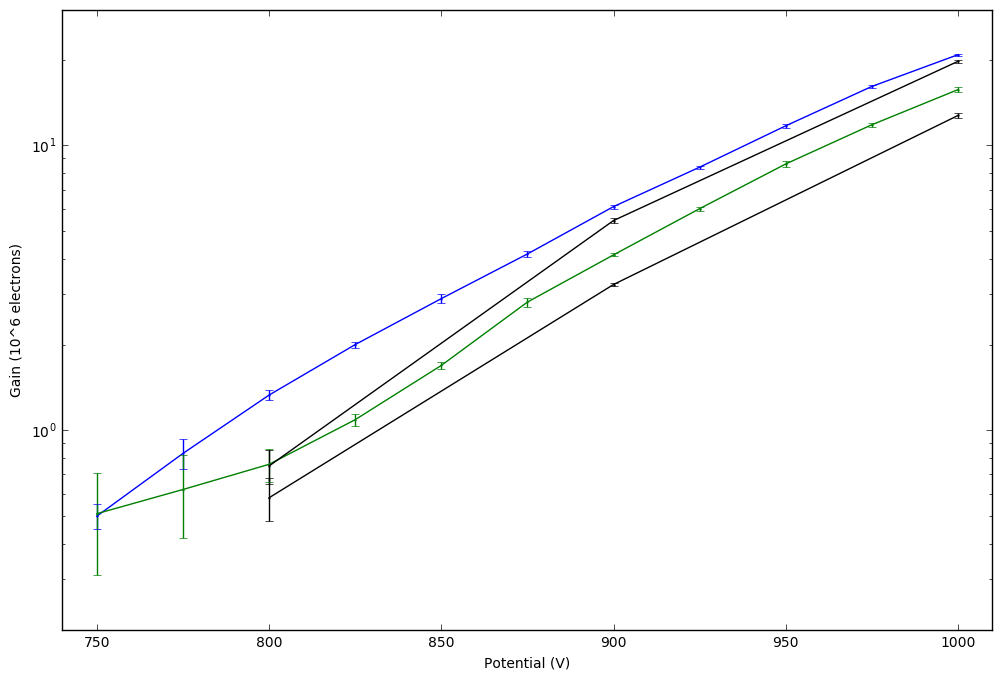

In [6]:
plt.errorbar(voltage, gain1, yerr = err1, marker = '.', markersize = 2, color = 'blue')
plt.errorbar(voltage, gain2, yerr = err2, marker = '.', markersize = 2, color = 'green')
plt.errorbar(tempvoltage, tempgain1, yerr = temperr1, marker = '.', markersize = 2, color = 'black')
plt.errorbar(tempvoltage, tempgain2, yerr = temperr2, marker = '.', markersize = 2, color = 'black')

plt.xlim(740, 1010)
plt.ylim(2e-1, 0.3e+2)
plt.xlabel('Potential (V)')
plt.ylabel('Gain (10^6 electrons)')
plt.yscale('log')
plt.savefig('newgains.pdf', format = 'pdf')
plt.show()

In [3]:
1.0147**25

1.4402620231738612